In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
datasetname = 'main_dataset.csv'
series = pd.read_csv(datasetname, header=0, index_col=0, parse_dates=True, squeeze=True)

## 15min interval and 1 hour forecast

In [3]:
#number of shifts

series = series.resample("15Min").mean()
shiftno=24
yshiftno=4
df15min = pd.DataFrame()
for _ in range(shiftno):
    df15min = pd.concat([df15min,series.shift(periods=_)],axis=1)
#form y values
for _ in range(yshiftno):
    df15min=pd.concat([df15min,series.shift(periods=-1*_-1)],axis=1)

collist = []
for _ in range(int(len(df15min.iloc[:,series.shape[1]*shiftno:].columns)/2)):
    collist.extend(["realpower_15min_"+str(_), "reactivepower_15min_"+str(_)])
collist_input = []
for _ in range(int(len(df15min.iloc[:,:series.shape[1]*shiftno].columns)/2)):
    collist_input.extend(["realpowerin_15min_"+str(_), "reactivepowerin_15min_"+str(_)])
    
collist_input.extend(collist)
df15min.columns = collist_input

In [4]:
# dataset = df2.iloc[shiftno-1:df2.shape[0]-yshiftno]

## 1hr interval

In [5]:
#number of shifts
series = pd.read_csv(datasetname, header=0, index_col=0, parse_dates=True, squeeze=True)
series = series.resample("1H").mean()

shiftno=24 #1 day
df24h = pd.DataFrame()
for _ in range(shiftno):
    df24h = pd.concat([df24h,series.shift(periods=_)],axis=1)

df24h = df24h.resample("15Min").ffill()

# collist = []
# for _ in range(int(len(df24h.iloc[:,series.shape[1]*shiftno:].columns)/2)):
#     collist.extend(["realpower_1day_"+str(_), "reactivepower_1day_"+str(_)])

collist_input = []
for _ in range(int(len(df24h.iloc[:,:series.shape[1]*shiftno].columns)/2)):
    collist_input.extend(["realpowerin_1Hr_"+str(_), "reactivepowerin_1Hr_"+str(_)])

# collist_input.extend(collist)
df24h.columns = collist_input

## 1 day interval

In [6]:
#number of shifts
series = pd.read_csv(datasetname, header=0, index_col=0, parse_dates=True, squeeze=True)
series = series.resample("24H").mean()

shiftno=7
df1w = pd.DataFrame()
for _ in range(shiftno):
    df1w = pd.concat([df1w,series.shift(periods=_)],axis=1)

df1w = df1w.resample("15Min").ffill()

collist_input = []
for _ in range(int(len(df1w.iloc[:,:series.shape[1]*shiftno].columns)/2)):
    collist_input.extend(["realpowerin_1D_"+str(_), "reactivepowerin_1D_"+str(_)])

# collist_input.extend(collist)
df1w.columns = collist_input


## 12 weeks interval

In [7]:
#number of shifts
series = pd.read_csv(datasetname, header=0, index_col=0, parse_dates=True, squeeze=True)
series = series.resample("1W").mean()

shiftno=12
df3mos = pd.DataFrame()
for _ in range(shiftno):
    df3mos = pd.concat([df3mos,series.shift(periods=_)],axis=1)

df3mos = df3mos.resample("15Min").ffill()

collist_input = []
for _ in range(int(len(df3mos.iloc[:,:series.shape[1]*shiftno].columns)/2)):
    collist_input.extend(["realpowerin_3Mos_"+str(_), "reactivepowerin_3Mos_"+str(_)])

# collist_input.extend(collist)
df3mos.columns = collist_input

In [8]:
dfall = pd.concat([df3mos,df1w,df24h,df15min],axis=1)

In [9]:
del df3mos,df1w,df24h,df15min # free up memory

In [10]:
dfall = dfall[~dfall.isnull().any(axis=1)]

In [11]:
list(dfall.iloc[:,:-12*2].columns)

['realpowerin_3Mos_0',
 'reactivepowerin_3Mos_0',
 'realpowerin_3Mos_1',
 'reactivepowerin_3Mos_1',
 'realpowerin_3Mos_2',
 'reactivepowerin_3Mos_2',
 'realpowerin_3Mos_3',
 'reactivepowerin_3Mos_3',
 'realpowerin_3Mos_4',
 'reactivepowerin_3Mos_4',
 'realpowerin_3Mos_5',
 'reactivepowerin_3Mos_5',
 'realpowerin_3Mos_6',
 'reactivepowerin_3Mos_6',
 'realpowerin_3Mos_7',
 'reactivepowerin_3Mos_7',
 'realpowerin_3Mos_8',
 'reactivepowerin_3Mos_8',
 'realpowerin_3Mos_9',
 'reactivepowerin_3Mos_9',
 'realpowerin_3Mos_10',
 'reactivepowerin_3Mos_10',
 'realpowerin_3Mos_11',
 'reactivepowerin_3Mos_11',
 'realpowerin_1D_0',
 'reactivepowerin_1D_0',
 'realpowerin_1D_1',
 'reactivepowerin_1D_1',
 'realpowerin_1D_2',
 'reactivepowerin_1D_2',
 'realpowerin_1D_3',
 'reactivepowerin_1D_3',
 'realpowerin_1D_4',
 'reactivepowerin_1D_4',
 'realpowerin_1D_5',
 'reactivepowerin_1D_5',
 'realpowerin_1D_6',
 'reactivepowerin_1D_6',
 'realpowerin_1Hr_0',
 'reactivepowerin_1Hr_0',
 'realpowerin_1Hr_1',
 're

In [12]:
from featurewiz import featurewiz

Imported DASK version = 0.0.83. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (13345, 142)
    Caution: We will try to reduce the memory usage of dataframe from 14.56 MB
    Memory usage after optimization is: 3.72 MB
        decreased by 74.5%
     Loaded. Shape = (13345, 142)
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Multi_Label Regression Feature Selection Started ####
    loading a random sample of 10000 rows into pandas for EDA
#########

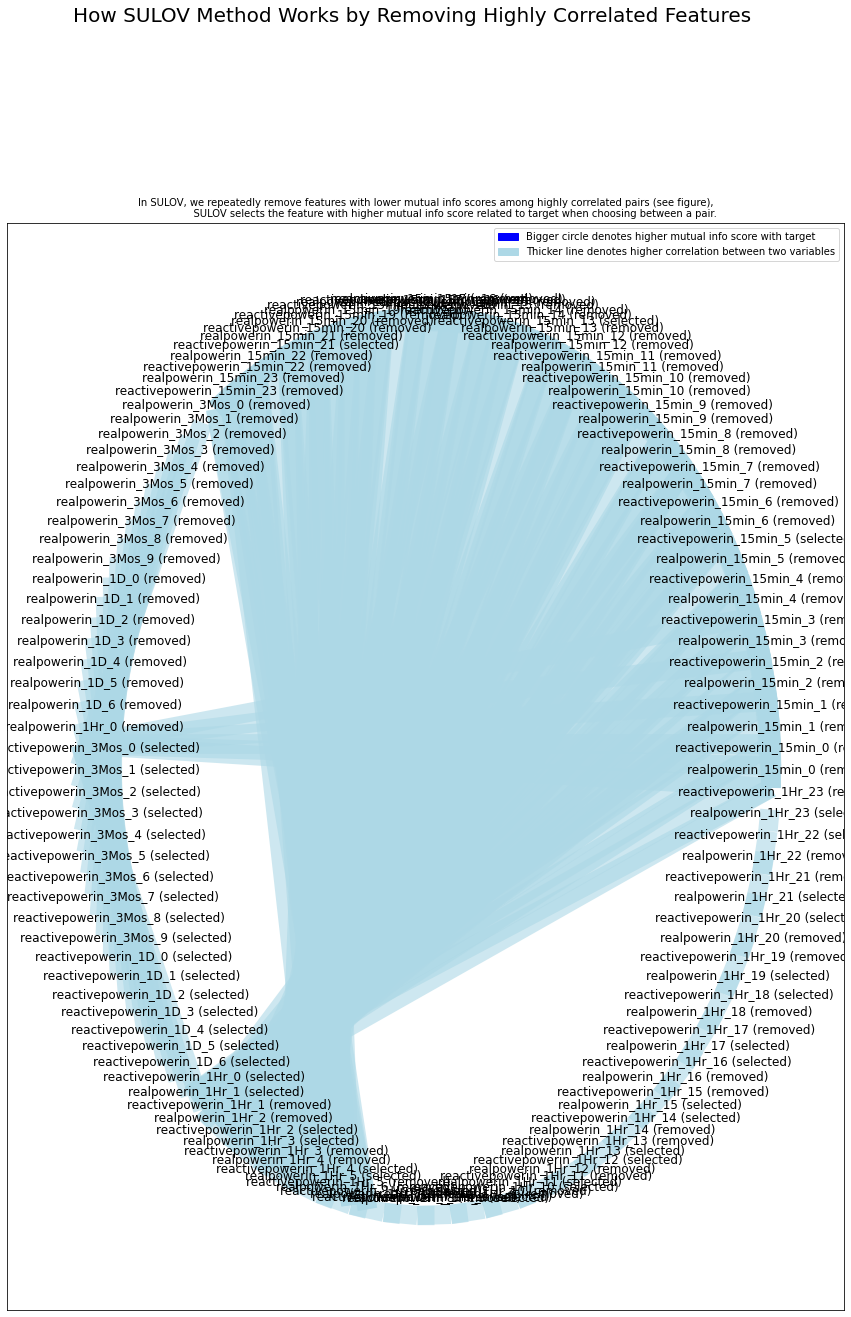

Time taken for SULOV method = 103 seconds
    Adding 0 categorical variables to reduced numeric variables  of 48
############## F E A T U R E   S E L E C T I O N  ####################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 48 
XGBoost version: 1.5.1
Number of booster rounds = 100
        using 48 variables...
            Time taken for regular XGBoost feature selection = 4 seconds
        using 38 variables...
            Time taken for regular XGBoost feature selection = 11 seconds
        using 28 variables...
            Time taken for regular XGBoost feature selection = 16 seconds
        using 18 variables...
            Time taken for regular XGBoost feature selection = 19 seconds
        using 8 variables...
            Time taken for regular XGBoost feature selection = 21 seconds
            Total time taken for XGBoost feature selection = 21 seconds
    ID variables are alway

In [13]:
outputs = featurewiz(dfall, list(dfall.iloc[:,-4*2:].columns), corr_limit=0.95, verbose=1, dask_xgboost_flag=False)

In [14]:
def backup(object, filename):
    with open(filename, 'wb') as f:
        pickle.dump(object, f, pickle.HIGHEST_PROTOCOL)

def reload(persist):
    with open(persist, 'rb') as f:
        # The protocol version used is detected automatically, so we do not
        # have to specify it.
        data = pickle.load(f)
    return data

In [15]:
backup(outputs,"outputs_feature_select_cont.pickle")

In [16]:
dfall.to_csv("ngboost_dataset.gz")